<a href="https://colab.research.google.com/github/hbisgin/datamining/blob/main/train_test_split_crossval_roc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train-Test Split, Cross-Validation, and ROC Curve

This notebook will demonstrate:
- How to **split data** into training and testing sets using `train_test_split`
- How to perform **cross-validation** to evaluate model performance
- How to **plot an ROC curve** to assess classification performance

We will use the **Breast Cancer dataset** from `sklearn.datasets`.


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Set style
sns.set_style("whitegrid")


In [42]:
# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Convert to DataFrame for visualization
df = pd.DataFrame(X, columns=data.feature_names)
df["target"] = y

# Display first few rows
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [43]:
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 455
Testing set size: 114


In [44]:
# Perform 5-fold cross-validation with Logistic Regression
model = LogisticRegression(max_iter=10000)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))


Cross-validation scores: [0.96703297 0.92307692 0.94505495 0.95604396 0.93406593]
Mean accuracy: 0.945054945054945


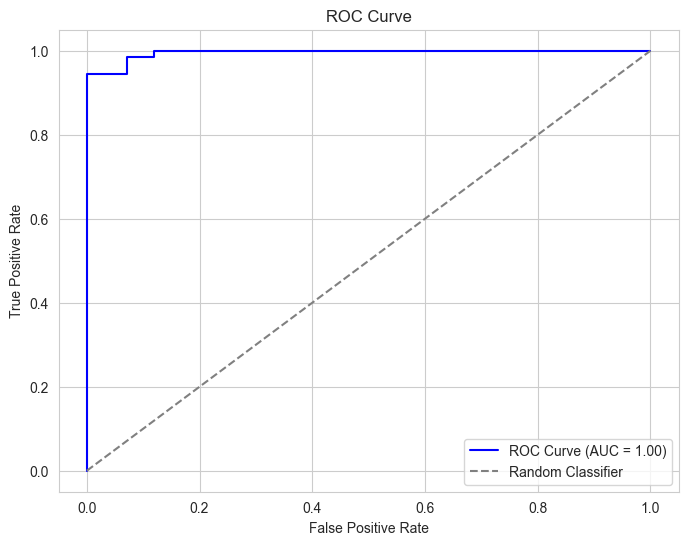

[[1.00000000e+00 3.41657281e-11]
 [3.51717079e-05 9.99964828e-01]
 [9.49328649e-01 5.06713510e-02]
 [3.95517511e-01 6.04482489e-01]
 [9.99999998e-01 2.04525261e-09]
 [1.74927921e-02 9.82507208e-01]
 [2.92409341e-05 9.99970759e-01]
 [9.99989929e-01 1.00712838e-05]
 [9.99950766e-01 4.92340221e-05]
 [1.00000000e+00 1.45291498e-10]
 [1.38043344e-03 9.98619567e-01]
 [9.95056705e-01 4.94329527e-03]
 [9.02238428e-04 9.99097762e-01]
 [9.99988791e-01 1.12086527e-05]
 [9.99427266e-01 5.72733537e-04]
 [6.08902568e-02 9.39109743e-01]
 [7.79580870e-01 2.20419130e-01]
 [2.13700999e-02 9.78629900e-01]
 [1.44372377e-03 9.98556276e-01]
 [2.05068908e-02 9.79493109e-01]
 [9.96131257e-01 3.86874311e-03]
 [9.87578489e-01 1.24215107e-02]
 [3.39147027e-04 9.99660853e-01]
 [7.52890212e-04 9.99247110e-01]
 [2.85609595e-02 9.71439041e-01]
 [6.44720938e-02 9.35527906e-01]
 [1.00000000e+00 4.52996451e-13]
 [5.52540081e-03 9.94474599e-01]
 [1.48812172e-03 9.98511878e-01]
 [3.29834424e-03 9.96701656e-01]
 [3.446811

In [45]:
# Fit model and get probabilities
model.fit(X_train, y_train)
y_scores = model.predict_proba(X_test)[:, 1]#we're only interested in the probabilities for the positive class. Therefore, skip column 0

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print(model.predict_proba(X_test))

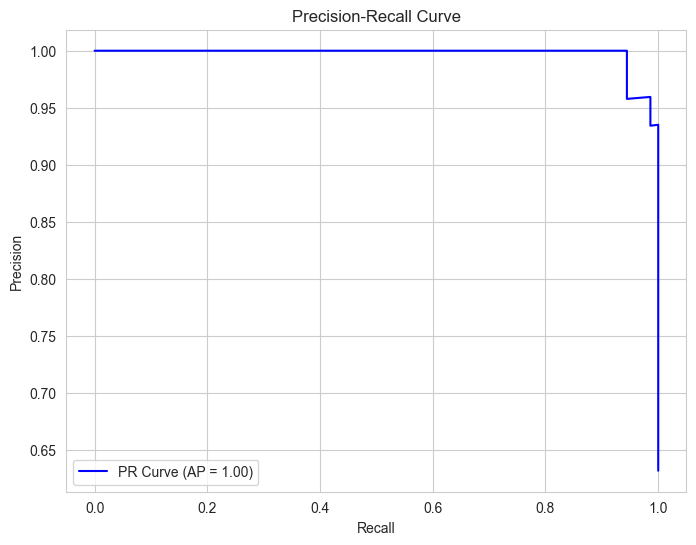

In [46]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Get precision-recall values
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Compute Average Precision (AP) Score
ap_score = average_precision_score(y_test, y_scores)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f"PR Curve (AP = {ap_score:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

## ✨ Lab questions

Try the following exercises to reinforce your learning:

1. Modify the `train_test_split` function to use **30% test data** instead of 20%.  
2. Change the classifier to **Support Vector Macines** and compare its ROC curve with Logistic Regression.  You can try different C values and vary your kernel functions. Please note that different kernel functions come with different parameters which you may want to change, too
3. Compute and visualize the **Precision-Recall Curve** in addition to the ROC curve.  (optional)


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

{np.int64(0), np.int64(1)}
SVM predicted probabilities for positive class: [7.54518096e-01 5.04362998e-04 1.04841024e-06 9.95867733e-01
 9.96391819e-01 4.77134335e-04 6.01849256e-04 3.56322196e-01
 9.51114330e-01 9.08512400e-01]
Logistic Regression predicted probabilities for positive class: [8.61662399e-01 4.64697192e-08 1.75810172e-03 9.98724851e-01
 9.99771615e-01 1.92533550e-10 6.17637874e-11 1.89545005e-02
 9.80158871e-01 9.94092742e-01]


c:\Users\garre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\garre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


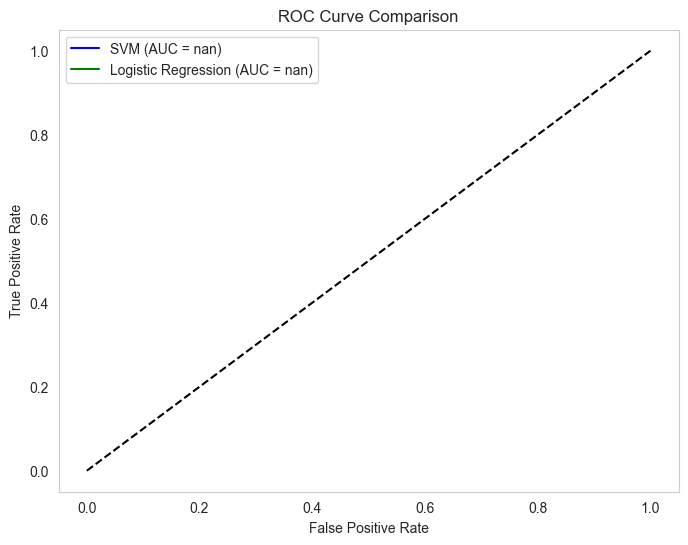

In [48]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train SVM
svm_model = SVC(C=1000, gamma=1e-05, kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)
svm_probs = svm_model.predict_proba(X_test)[:,1]

# Train Logistic Regression
log_model = LogisticRegression(max_iter=5000)  # Try 5000 or higher
log_model.fit(X_train, y_train)
log_probs = log_model.predict_proba(X_test)[:,1]

# ROC Curves
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs, pos_label='tested_positive')
fpr_log, tpr_log, _ = roc_curve(y_test, log_probs, pos_label='tested_positive')

# AUC Scores
auc_svm = auc(fpr_svm, tpr_svm)
auc_log = auc(fpr_log, tpr_log)

print(set(y_test))
print(f"SVM predicted probabilities for positive class: {svm_probs[:10]}")
print(f"Logistic Regression predicted probabilities for positive class: {log_probs[:10]}")
# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})', color='blue')
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.show()


c:\Users\garre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


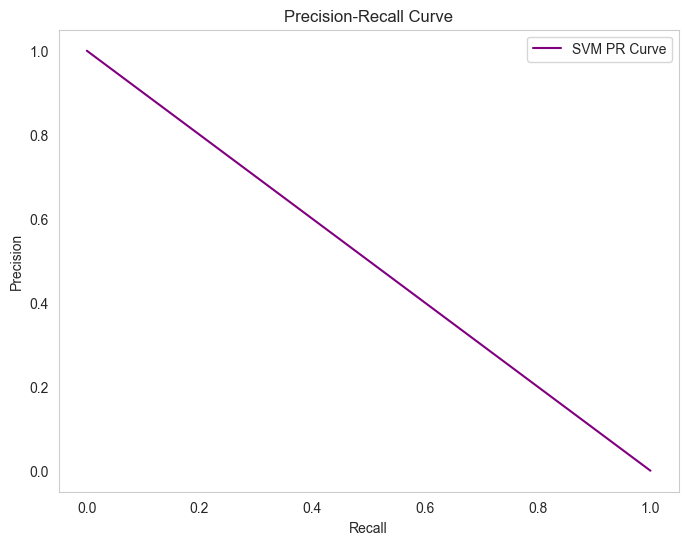

In [49]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, svm_probs, pos_label='tested_positive')

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='SVM PR Curve', color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.legend()
plt.show()